In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('rock_density_xray.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.describe()

,Rebound Signal Strength nHz,Rock Density kg/m3
count,300.000000,300.000000
mean,49.725766,2.225063
std,28.341792,0.314512
min,0.700227,1.500000
25%,25.685798,1.987830
50%,50.602886,2.268597
75%,74.854294,2.476944
max,98.831658,2.750000


In [3]:
df.columns= ['signal' , 'density']

<Axes: >

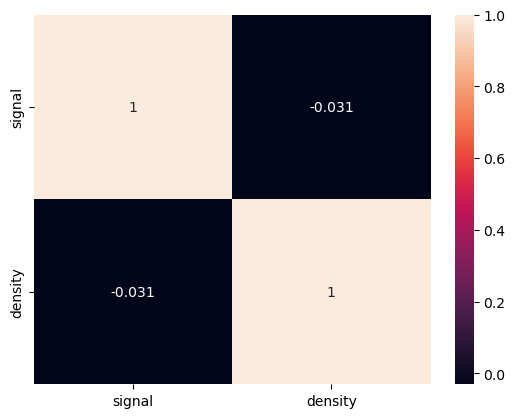

In [6]:
sns.heatmap(df.corr() , annot=True)

<Axes: xlabel='signal', ylabel='density'>

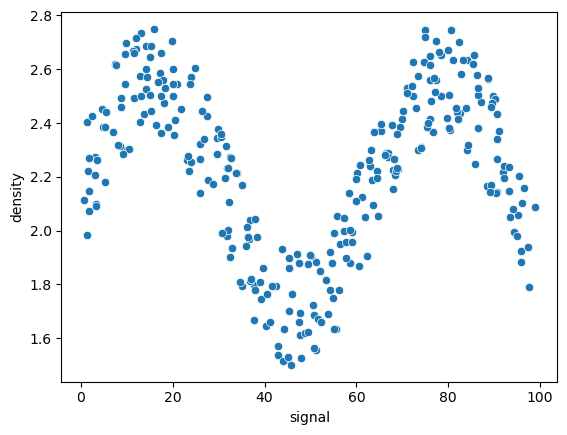

In [7]:
sns.scatterplot(df , x='signal' , y='density' )

### در مسایلی که تنها یک ستون بعنوان متغییر مستقل انتخاب می شود باید شکل ستون را به صورت زیر تغییر داد  اگر این کار را نکنیم بصورت آرایه نامپای می شود و خطا می دهد

In [4]:
X=df['signal'].values.reshape(-1 ,1)
y=df['density']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# linear regression

In [28]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train , y_train)

LinearRegression()

In [10]:
lr_pred=lr_model.predict(X_test)

In [8]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [12]:
MAE=mean_absolute_error(y_test , lr_pred)
RMSE=np.sqrt(mean_squared_error(y_test , lr_pred))
MAE , RMSE

(0.211198973318633, 0.2570051996584629)

In [13]:
df['density'].mean()

2.225062949323796

In [14]:
signal_range= np.arange(0,100)
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [15]:
signal_range_pred=lr_model.predict(signal_range.reshape(-1 , 1))

<Axes: xlabel='signal', ylabel='density'>

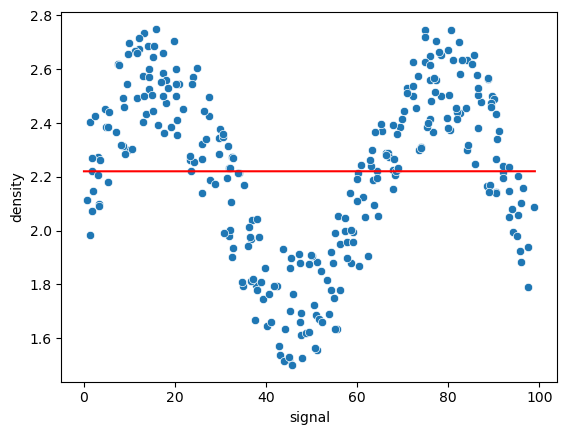

In [16]:
plt.plot(signal_range_pred , 'r')
sns.scatterplot(x='signal' , y='density' , data=df)

In [6]:
def run_model(model , X_train , y_train , X_test , y_test):
    #fit model
    model.fit(X_train , y_train)
    
    # get metic
    y_pred=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test , y_pred))
    print(f'RMSE:{rmse}')
    
    # plot result
    creat_signal=np.arange(0,120)
    out_put=model.predict(creat_signal.reshape(-1 , 1))
    plt.figure(figsize=(8,8))
    sns.scatterplot(x='signal' , y='density' , data=df)
    plt.plot(out_put , 'r')

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# polynomial features

RMSE:0.28173095637255835
RMSE:0.2879748127921242
RMSE:0.1458863339756185
RMSE:0.14452812867837028
RMSE:0.13807383449323551
RMSE:0.1361534844595092
RMSE:0.13545169497601628


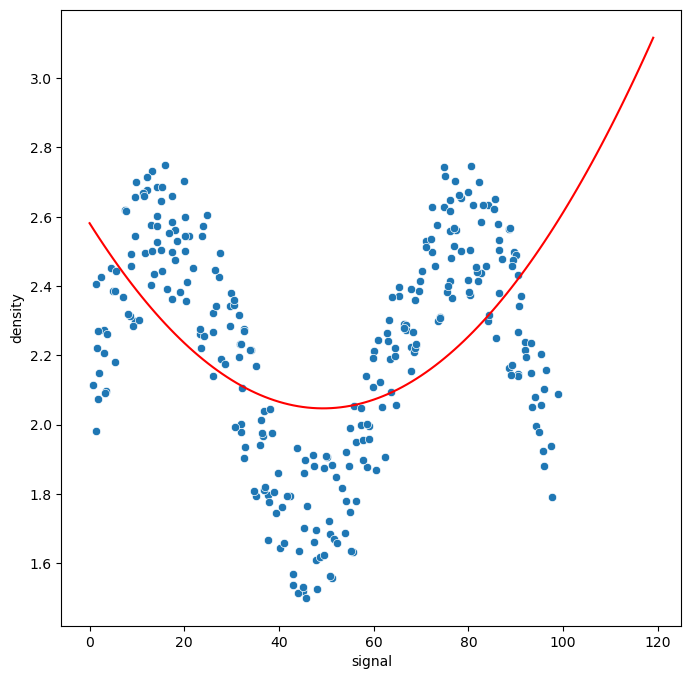

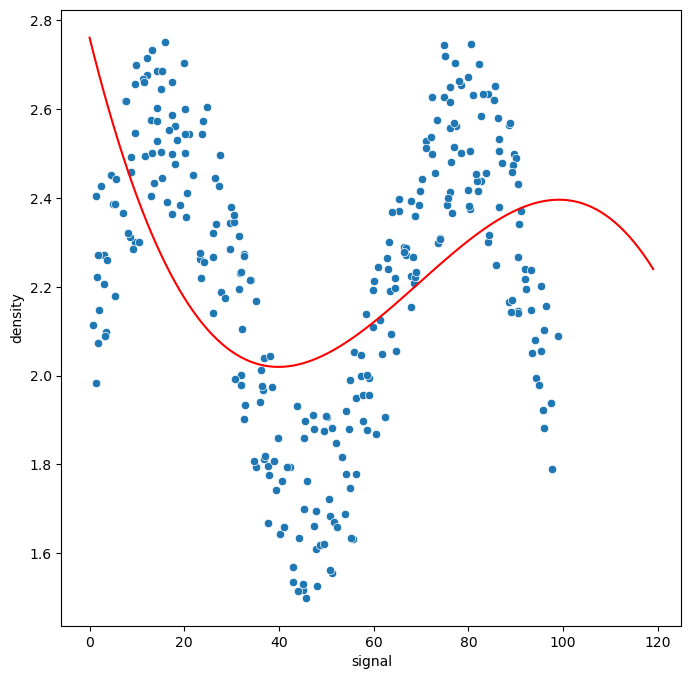

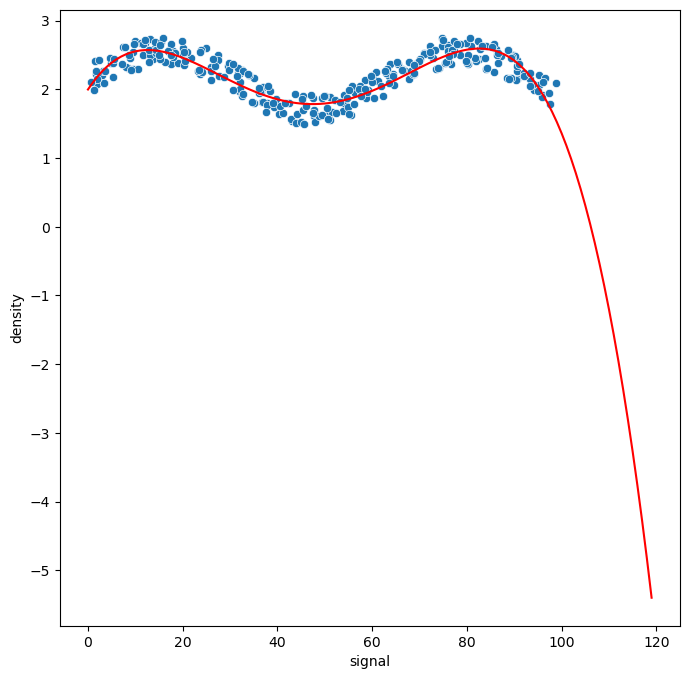

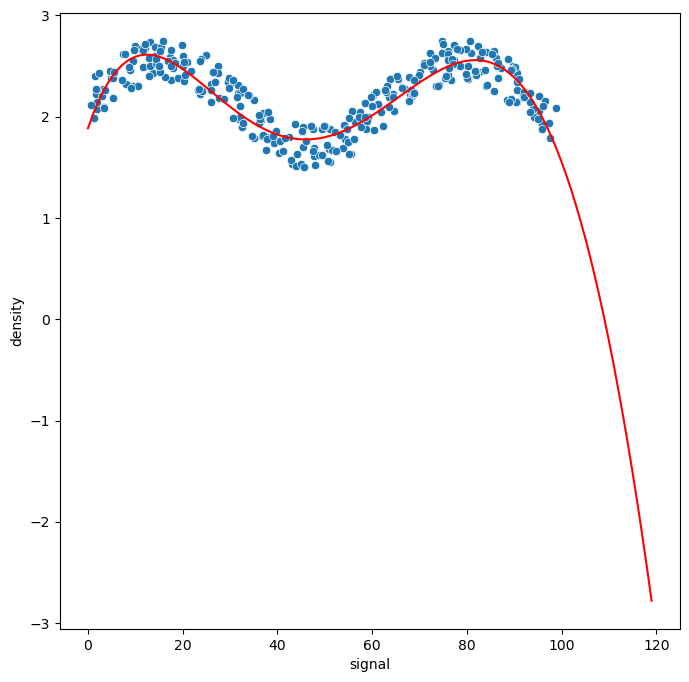

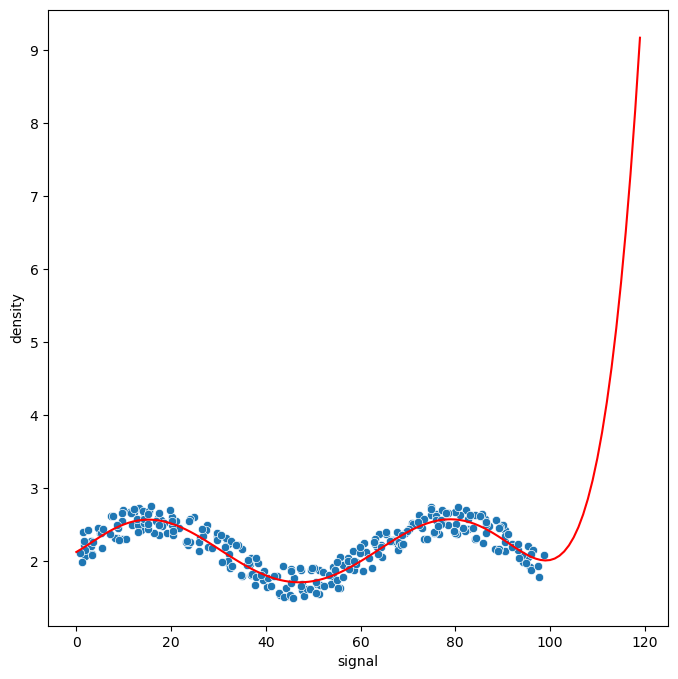

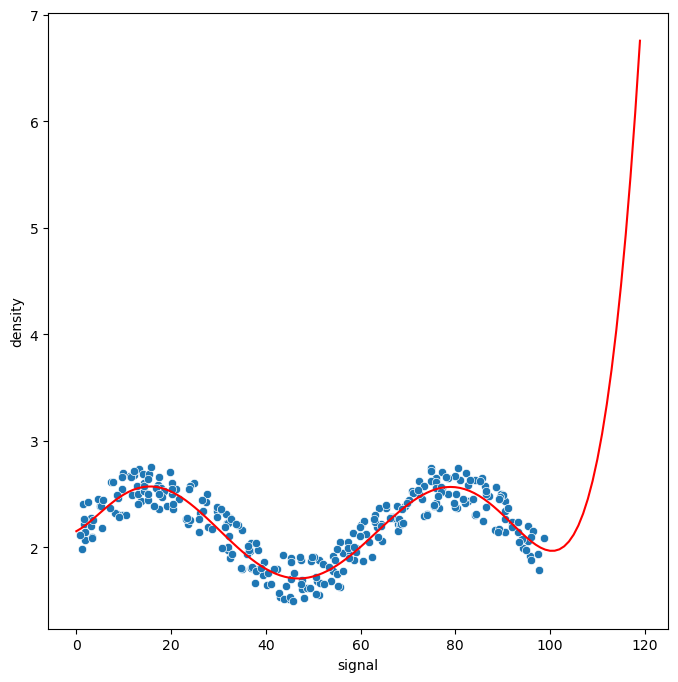

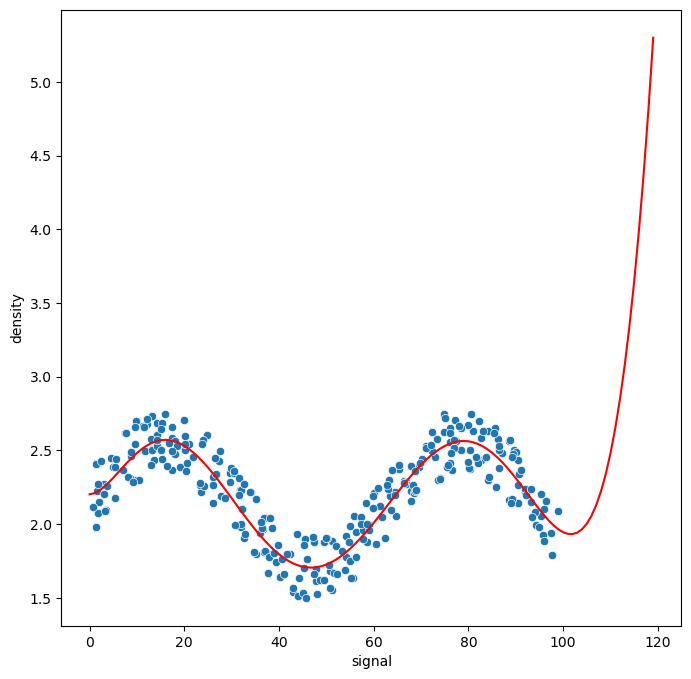

In [29]:
for n in range(2 , 9):
    poly_model=make_pipeline(PolynomialFeatures(n) , LinearRegression())
    run_model(poly_model , X_train , y_train , X_test , y_test)

# knn regression

In [8]:
from sklearn.neighbors import KNeighborsRegressor

RMSE:0.1523487028635337
RMSE:0.14030131751235314
RMSE:0.14026621441401851
RMSE:0.13891051654980408
RMSE:0.13730685016923647
RMSE:0.13335364509538658
RMSE:0.13895768259318805
RMSE:0.1384265533347639
RMSE:0.1341668755221009


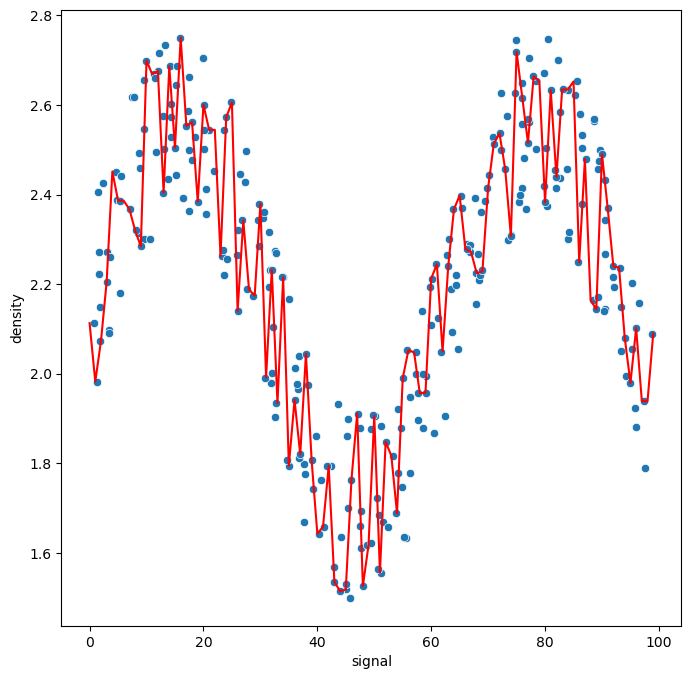

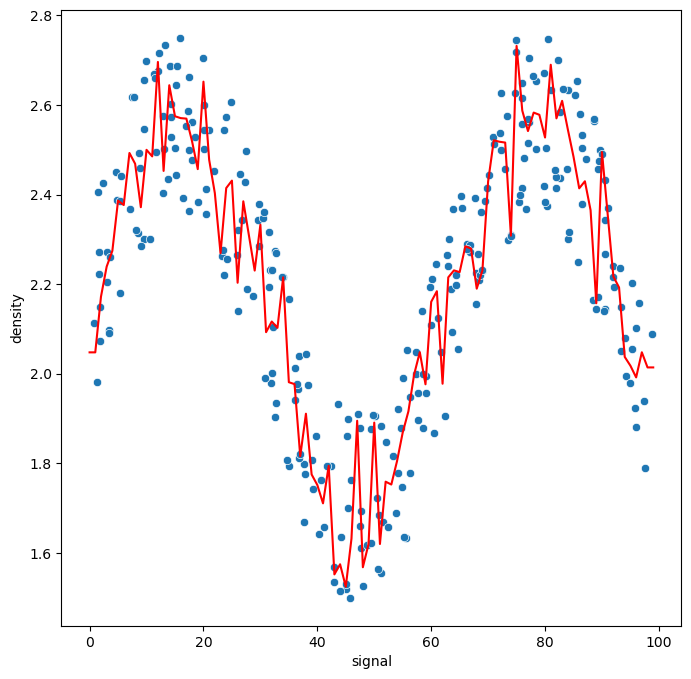

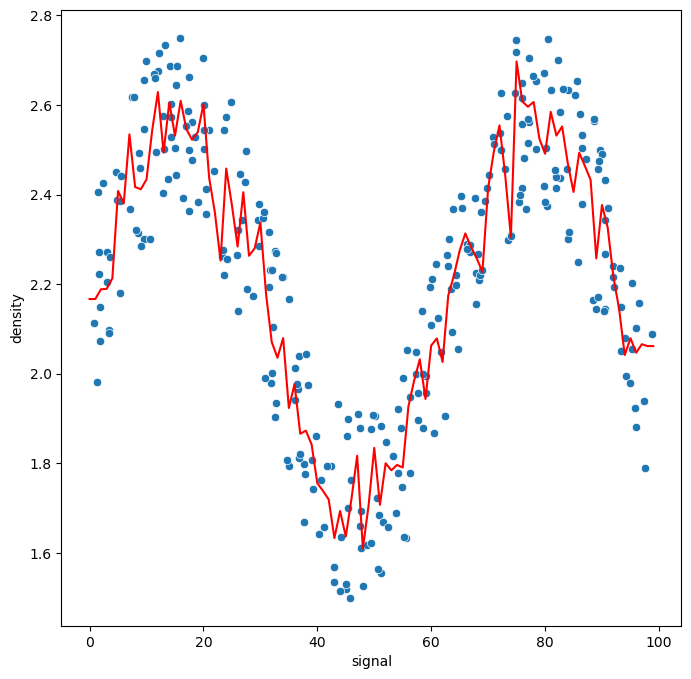

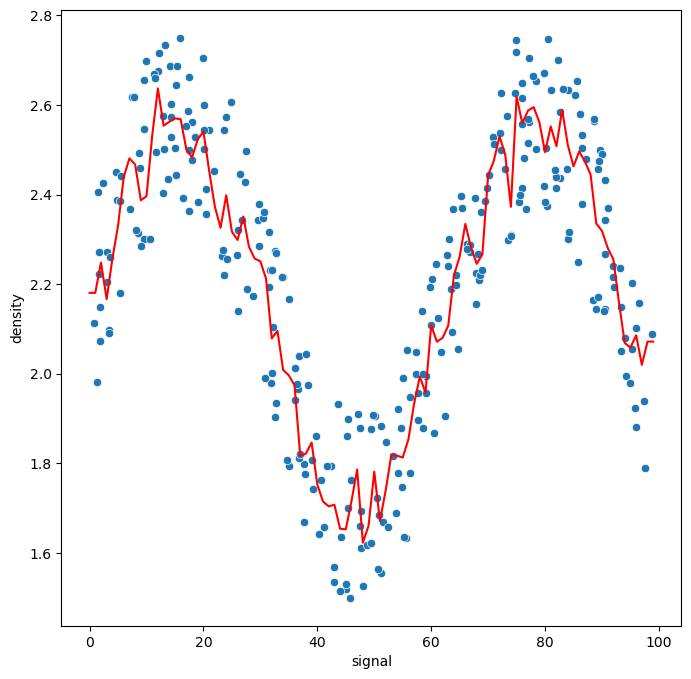

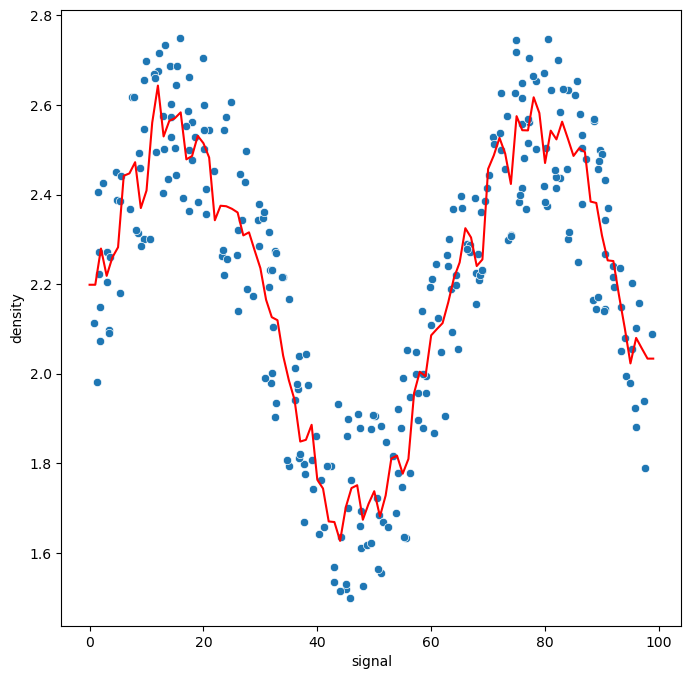

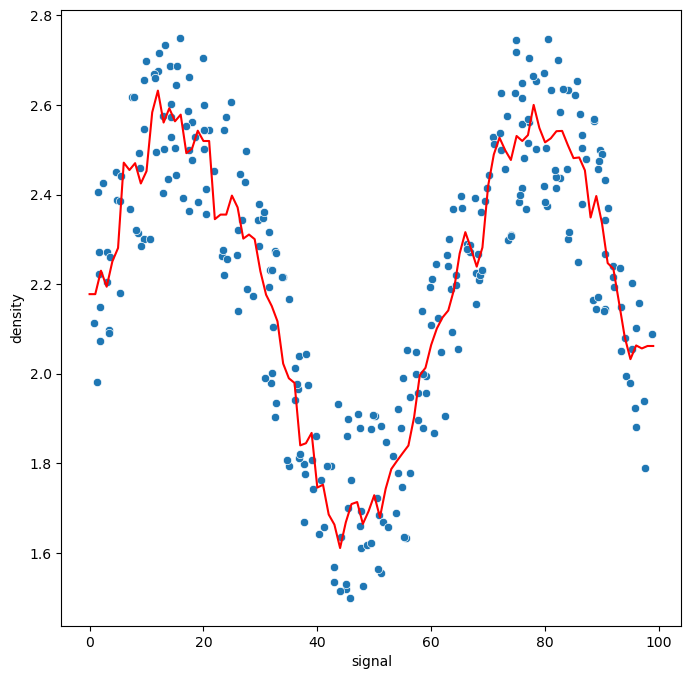

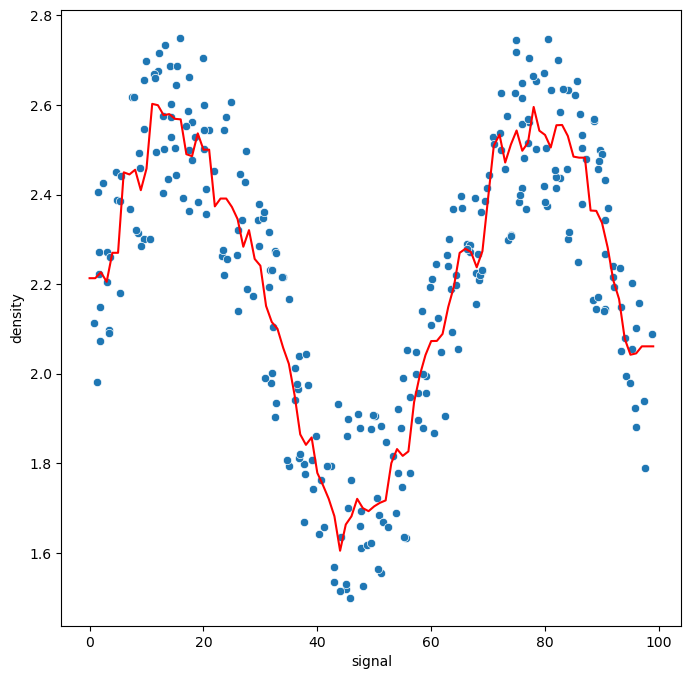

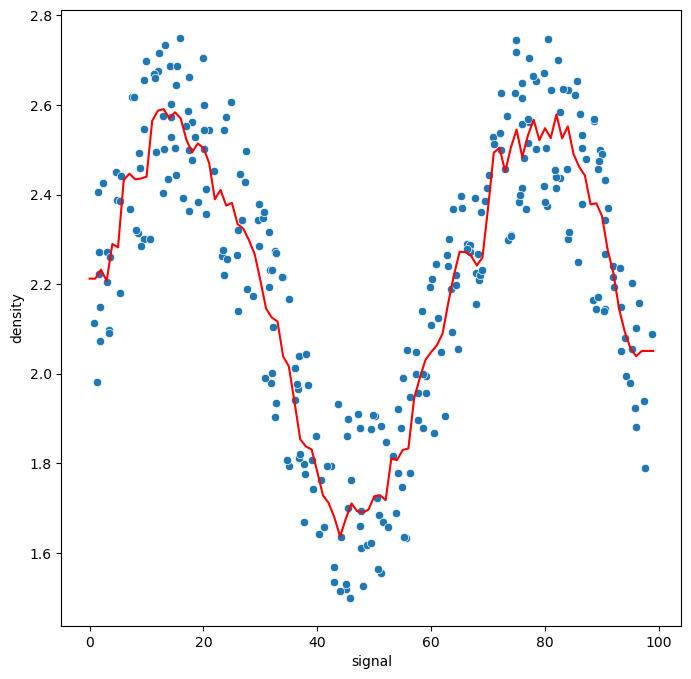

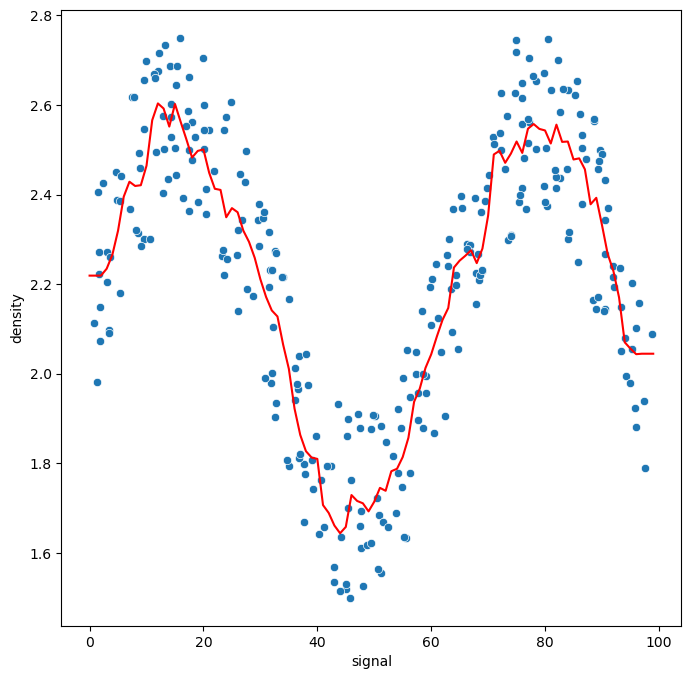

In [11]:
for n in range(1,10):
    knn_model=KNeighborsRegressor(n_neighbors=n)
    run_model(knn_model , X_train , y_train , X_test , y_test)

# Decission Tree Regression

In [12]:
from sklearn.tree import DecisionTreeRegressor

RMSE:0.1523487028635337


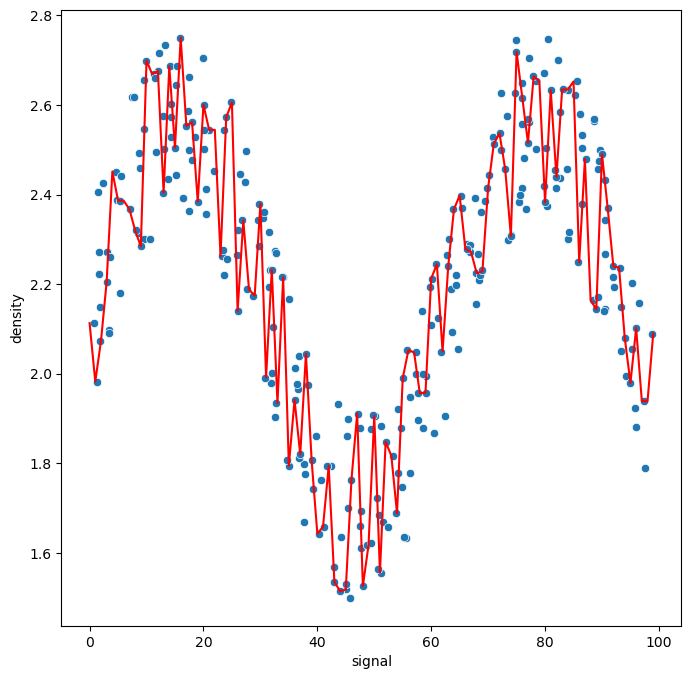

In [13]:
tree_model=DecisionTreeRegressor()
run_model(tree_model , X_train , y_train , X_test , y_test)

In [14]:
tree_model.get_n_leaves()

270

# suport vector regression

In [16]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

RMSE:0.12646999302046696


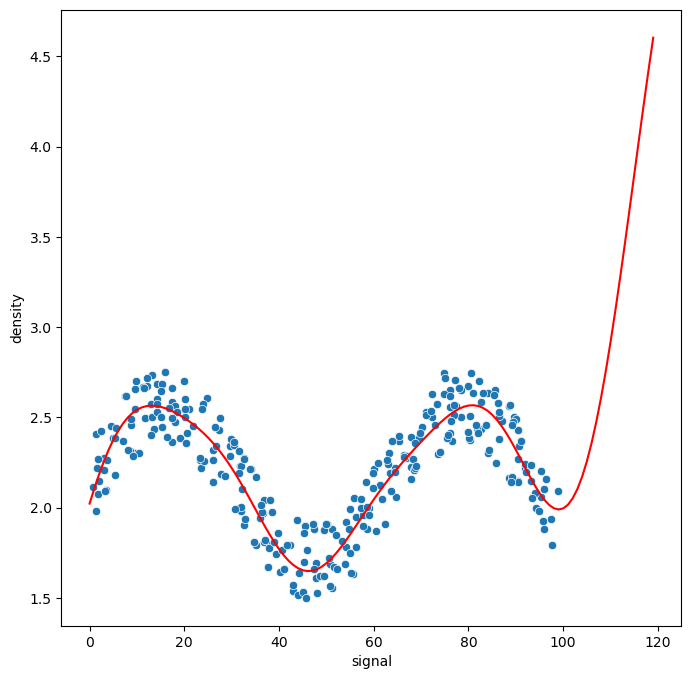

In [24]:
param_grid={'C':[0.0001 , 0.001 , 0.01 , 0.1 , 1 , 5 , 10 , 100 , 1000 , 10000], 'gamma':['auto' , 'scale']}
svr_model=SVR()
grid_model=GridSearchCV(svr_model , param_grid )
run_model(grid_model , X_train , y_train , X_test , y_test)

In [20]:
grid_model.best_params_

{'C': 1000, 'gamma': 'scale'}

# Random Forest Regression

In [25]:
from sklearn.ensemble import RandomForestRegressor

RMSE:0.12530545574153354
RMSE:0.13481821773526964
RMSE:0.13307294116323595
RMSE:0.13355097069687813


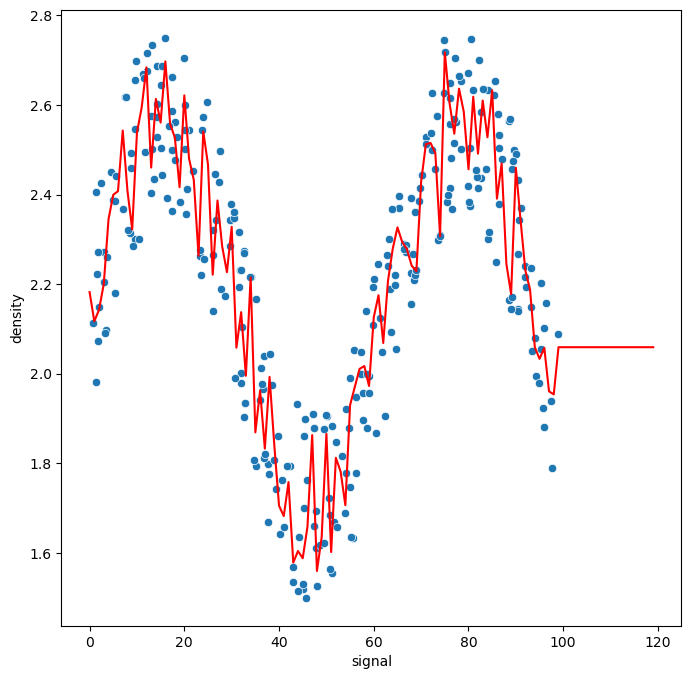

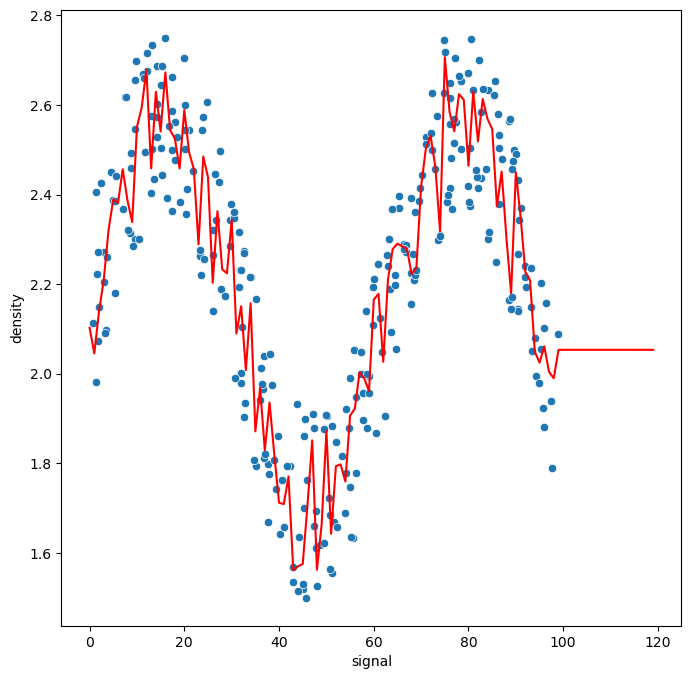

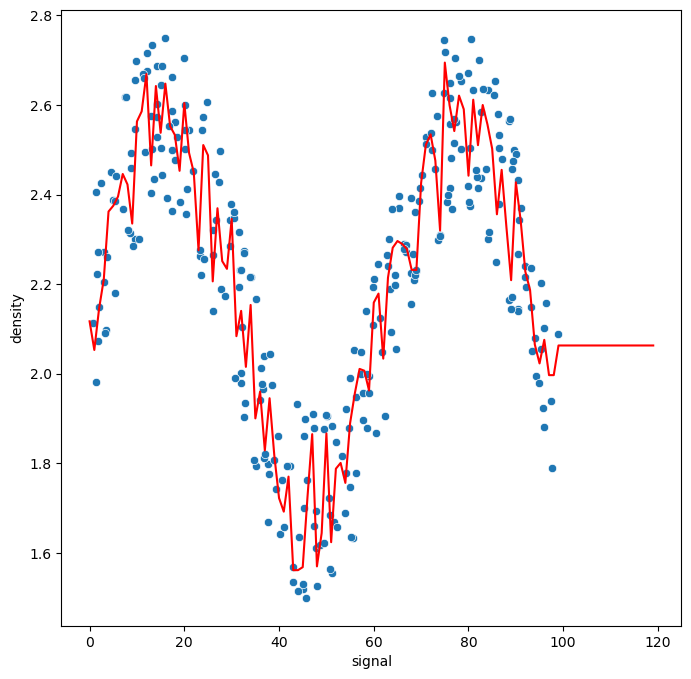

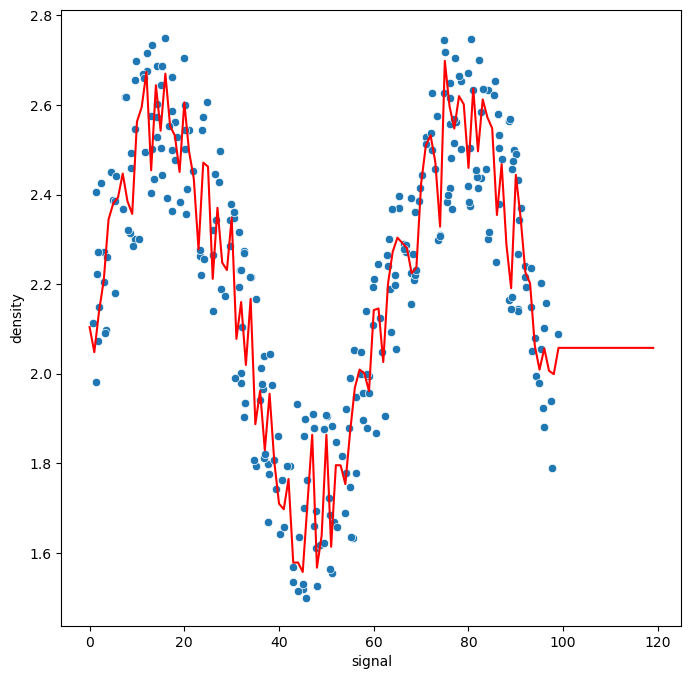

In [26]:
trees=[10 , 64 , 100 , 128]
for n in trees:
    rfr_model=RandomForestRegressor(n_estimators=n)
    run_model(rfr_model , X_train , y_train , X_test , y_test)

In [5]:
from sklearn.ensemble import AdaBoostRegressor

RMSE:0.13272578988067998


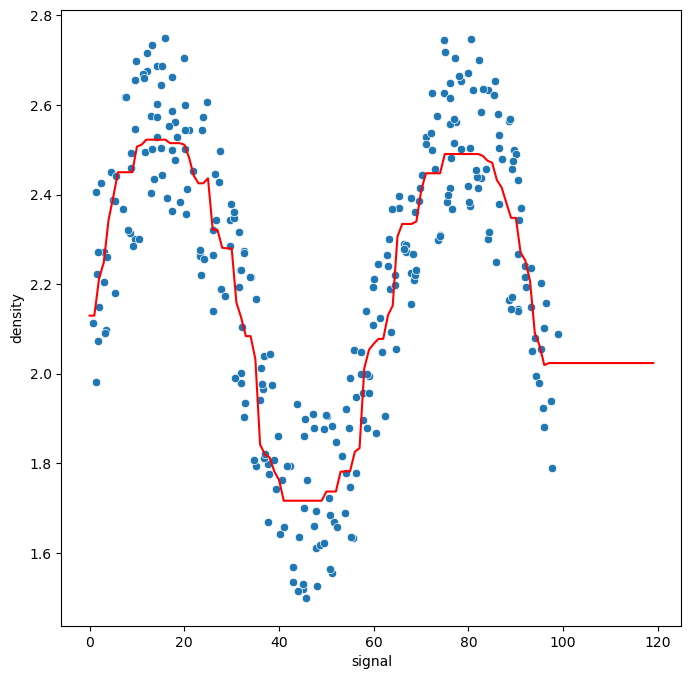

In [9]:
ada_model=AdaBoostRegressor()
run_model(ada_model , X_train , y_train , X_test , y_test)

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

RMSE:0.13294148649584667


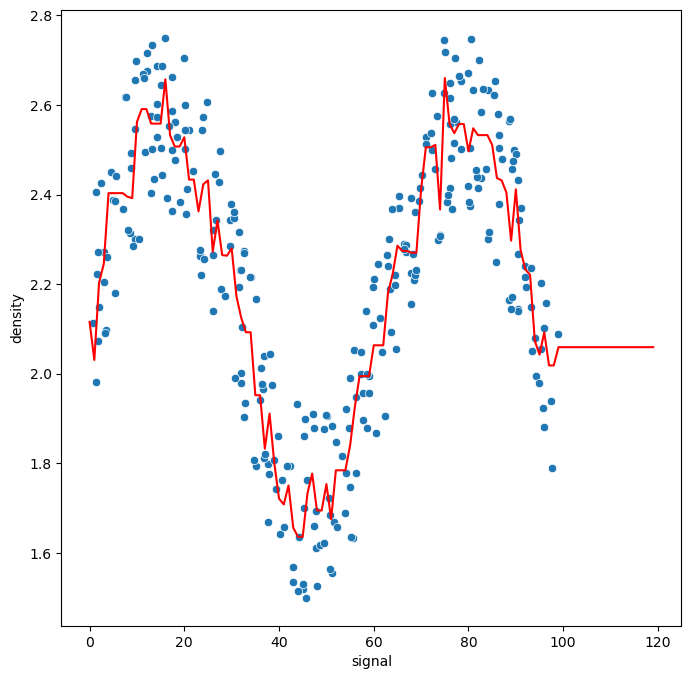

In [11]:
gradient_boost_model=GradientBoostingRegressor()
run_model(gradient_boost_model ,  X_train , y_train , X_test , y_test)